In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
from math import inf
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
    return G

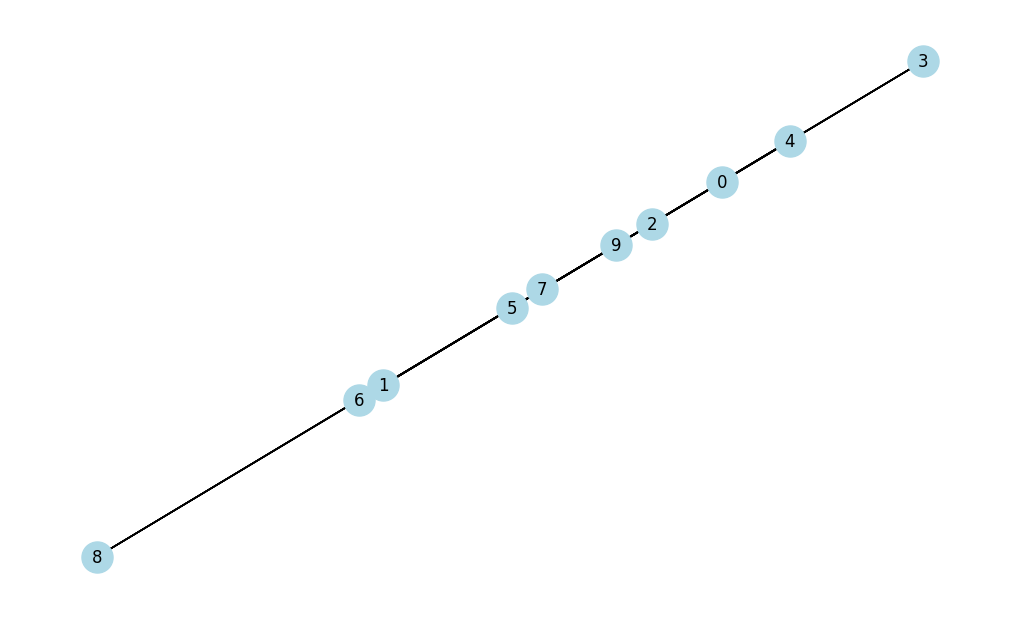

In [4]:
G = gnp_random_connected_graph(10, 1, False, True)

За яким принципом проводиться експеримент: ми будемо порівнювати наші та вбудовані алгоритми на вершинах: 5, 10, 20, 50, 100, 250, 500. Було використано бібліотеку time для занотування результатів ефективності алгоритмів. Графік роботи буде представлено за допомою бібліотеки matplotlib.pylot. 

# For Task 1

## Kruskal's algorithm

In [5]:
from networkx.algorithms import tree

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

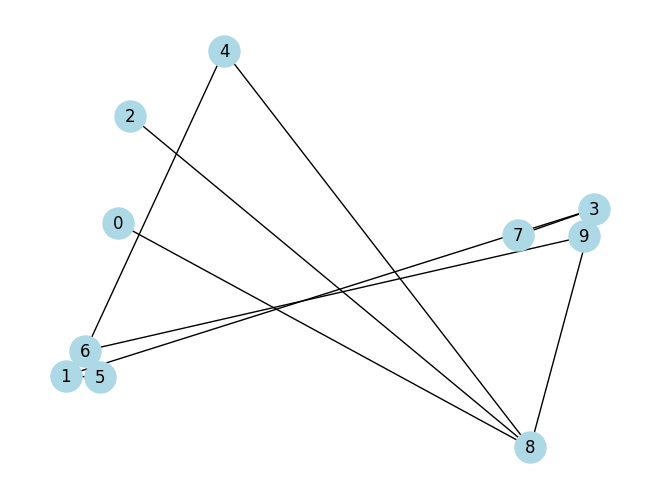

In [7]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 8), (1, 3), (1, 5), (2, 8), (3, 8), (3, 7), (4, 8), (4, 6), (6, 9)]),
 9)

In [9]:
from copy import deepcopy

def make_stek(connected_lst, edge: list) -> list | bool:
    """
    Creates a stek
    """
    stek1 = None
    stek2 = None
    copy_connected = deepcopy(connected_lst)
    for _, stek in enumerate(connected_lst):

        if edge[0] in stek and edge[1] in stek:
            return False

        elif edge[0] in stek:
            stek1 = stek
            copy_connected.remove(stek)

        elif edge[1] in stek:
            stek2 = stek
            copy_connected.remove(stek)

    stek1.update(stek2)
    copy_connected.append(stek1)
    return copy_connected

def kruskal(g):
    """
    Make a Kruskal algorythm
    """
    frame_krusk = nx.Graph()
    edges = {(key, key1): value1['weight'] for key, value in g.adj.items() for key1, value1 in value.items()}
    
    sorted_edges = dict(sorted(edges.items(), key = lambda x: x[1]))
    
    stek_nodes = list({nd} for nd in g.nodes)
    lst_nodes = []
    for edge, weigh in sorted_edges.items():
    
        if len(stek_nodes) == 1:
            return frame_krusk

        copy_stek = deepcopy(stek_nodes)

        if make_stek(copy_stek, edge):
            stek_nodes = make_stek(stek_nodes, edge)
            lst_nodes.append(edge)
            frame_krusk.add_edge(*edge, weight = weigh)

    return frame_krusk
     
frame_krsk = kruskal(G)

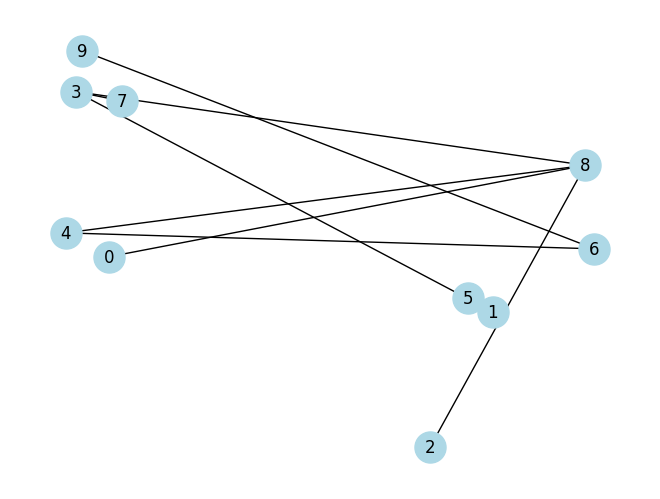

In [10]:
nx.draw(frame_krsk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: -1
Our algorithm worked in: 0.000. With total weight of: -1

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: -10
Our algorithm worked in: 0.000. With total weight of: -10

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: 8
Our algorithm worked in: 0.000. With total weight of: 8

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: 6
Our algorithm worked in: 0.000. With total weight of: 6

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: 14
Our algorithm worked in: 0.000. With total weight of: 14

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -18
Our algorithm worked in: 0.000. With total weight of: -18

10 nodes
Built-in algorithm worked in: 0.004. With total weight of: -22
Our algorithm worked in: 0.000. With total weight of: -22

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -21
Our algorithm worked in: 0.

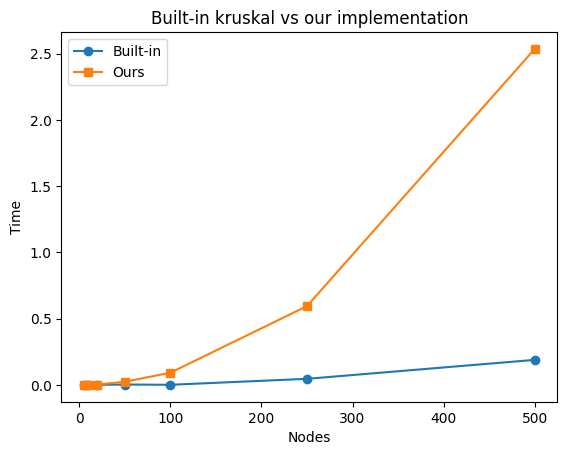

In [11]:
import matplotlib.pyplot as plt
from time import time
vertices_num = [5,10,20,50,100,250,500]
y1 = []
y2 = []

for i in vertices_num:

    time_sum = 0
    time_sum_own = 0
    for _ in range(4):

        G_ = gnp_random_connected_graph(i, 1, False, False)

        print(i, "nodes")

        start = time()
        mstp_ = tree.minimum_spanning_tree(G_, algorithm="kruskal")
        stop = time() - start
        print(f"Built-in algorithm worked in: {stop:.3f}. With total weight of: {sum(mstp_.get_edge_data(*edge)['weight'] for edge in mstp_.edges)}")
        time_sum += stop

        start = time()
        mstp_own = kruskal(G_)
        stop = time() - start
        print(f"Our algorithm worked in: {stop:.3f}. With total weight of: {sum(mstp_own.get_edge_data(*edge)['weight'] for edge in mstp_own.edges)}\n")
        time_sum_own += stop

    y1.append(float(f"{time_sum/4:.3f}"))
    y2.append(float(f"{time_sum_own/4:.3f}"))
    
plt.plot(vertices_num, y1, label='Built-in', marker='o')

# Plotting the second dataset
plt.plot(vertices_num, y2, label='Ours', marker='s')

# Adding labels and title
plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Built-in kruskal vs our implementation')

# Adding a legend to differentiate between datasets
plt.legend()

# Display the plot
plt.show()

Підсумок: як і з алгоритмом Прима: вбудований алгоритм працює краще нашого, хоча на невеликій кількості вершин це не є помітним. Це пов’язано з тим, що функція make_stek повторюється 2 рази , перед тим, як додати ребро, що ускладнює алгоритм, враховуючи, що в самій функції, виконуються операції copy та update, що дещо більше заповнює пам’ять та ускладнює алгоритм. 

## Prim's algorithm

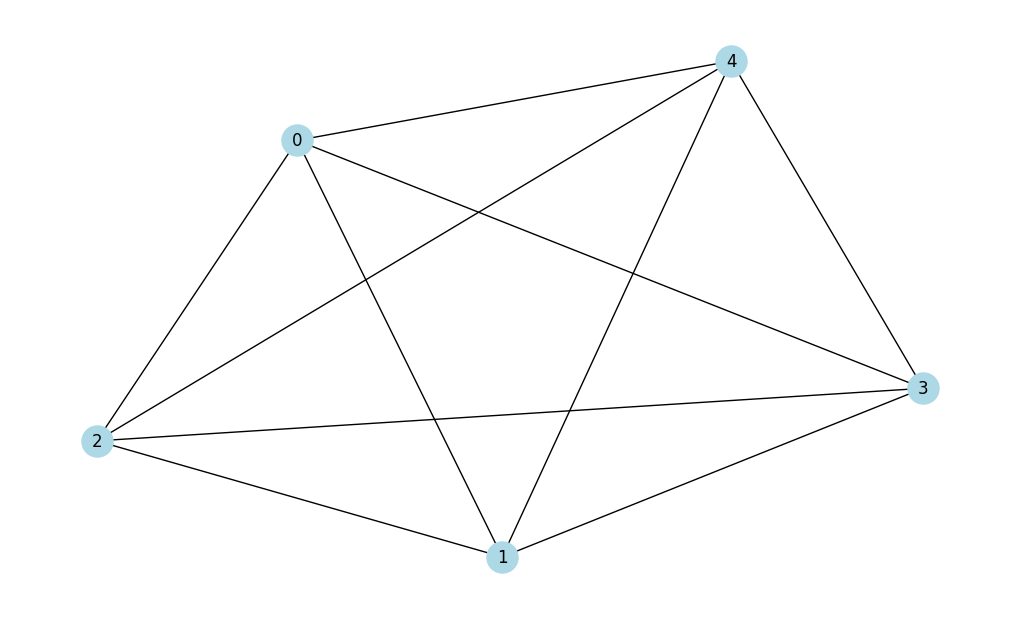

In [12]:

G = gnp_random_connected_graph(5, 1, False, True)

{'weight': 2}
{'weight': 10}
{'weight': 10}
{'weight': 6}
28


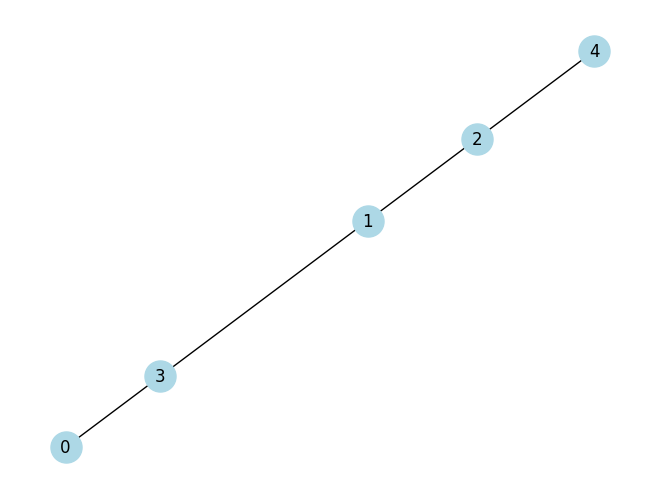

In [13]:
def prims_algorithm(graph, starting_node: int):

    frame = nx.Graph()
    frame.add_node(starting_node)

    num_of_nodes = len(graph)
    accessed_notes = [starting_node]

    while len(accessed_notes) < num_of_nodes:

        min_weight, new_min_node = inf, (-1, -1)

        for node in accessed_notes:
            for neighbor, info in graph[node].items():
                if info["weight"] < min_weight and neighbor not in accessed_notes:
                    min_weight = info["weight"]
                    new_min_node = node, neighbor
                    
        accessed_notes.append(new_min_node[1])
        frame.add_node(new_min_node[1])
        frame.add_edge(*new_min_node, weight = min_weight)
        
    return frame
        
self_done = prims_algorithm(G, 1)

nx.draw(self_done, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

for edge in self_done.edges:
    print(self_done.get_edge_data(*edge))
print(sum(self_done.get_edge_data(*edge)["weight"] for edge in self_done.edges))

In [14]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

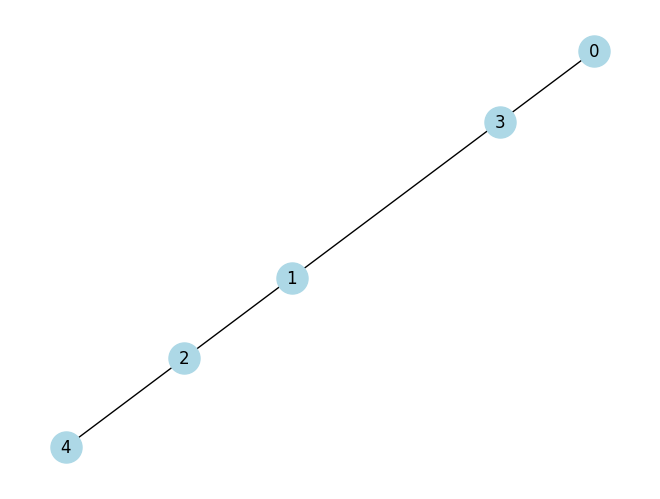

In [15]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [16]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 3), (1, 3), (1, 2), (2, 4)]), 4)

# Comparison

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: -1
Our algorithm worked in: 0.000. With total weight of: -1

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: -5
Our algorithm worked in: 0.000. With total weight of: -5

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: 16
Our algorithm worked in: 0.000. With total weight of: 16

5 nodes
Built-in algorithm worked in: 0.000. With total weight of: -1
Our algorithm worked in: 0.000. With total weight of: -1

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -5
Our algorithm worked in: 0.000. With total weight of: -5

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -14
Our algorithm worked in: 0.000. With total weight of: -14

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -16
Our algorithm worked in: 0.000. With total weight of: -16

10 nodes
Built-in algorithm worked in: 0.000. With total weight of: -25
Our algorithm worked in: 

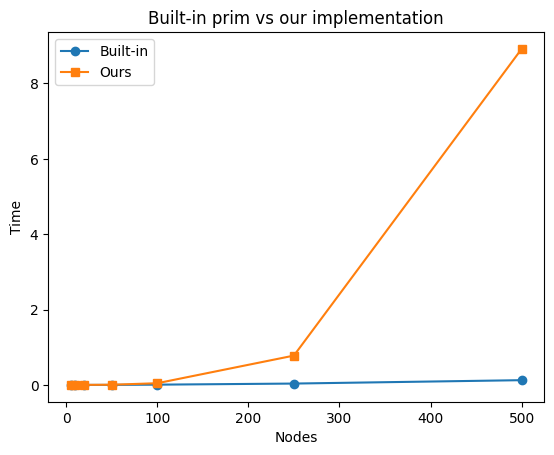

In [17]:
import matplotlib.pyplot as plt
from time import time
vertices_num = [5,10,20,50,100,250,500]
y1 = []
y2 = []

for i in vertices_num:

    time_sum = 0
    time_sum_own = 0
    for _ in range(4):

        G_ = gnp_random_connected_graph(i, 1, False, False)

        print(i, "nodes")

        start = time()
        mstp_ = tree.minimum_spanning_tree(G_, algorithm="prim")
        stop = time() - start
        print(f"Built-in algorithm worked in: {stop:.3f}. With total weight of: {sum(mstp_.get_edge_data(*edge)['weight'] for edge in mstp_.edges)}")
        time_sum += stop

        start = time()
        mstp_own = prims_algorithm(G_, 1)
        stop = time() - start
        print(f"Our algorithm worked in: {stop:.3f}. With total weight of: {sum(mstp_own.get_edge_data(*edge)['weight'] for edge in mstp_own.edges)}\n")
        time_sum_own += stop

    y1.append(float(f"{time_sum/4:.3f}"))
    y2.append(float(f"{time_sum_own/4:.3f}"))
    
plt.plot(vertices_num, y1, label='Built-in', marker='o')

# Plotting the second dataset
plt.plot(vertices_num, y2, label='Ours', marker='s')

# Adding labels and title
plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Built-in prim vs our implementation')

# Adding a legend to differentiate between datasets
plt.legend()

# Display the plot
plt.show()

Підсумок: вбудований алгоритм працює краще нашого, хоча на невеликій кількості вершин це не є помітним. Наш алгоритм працює гірше через те, що у вбудованому є додаткові умови(if, else), які не дають робити ‘зайві’ кроки алгоритму, тобто пропускаючи непотрібні ітерації.

# For Task 2

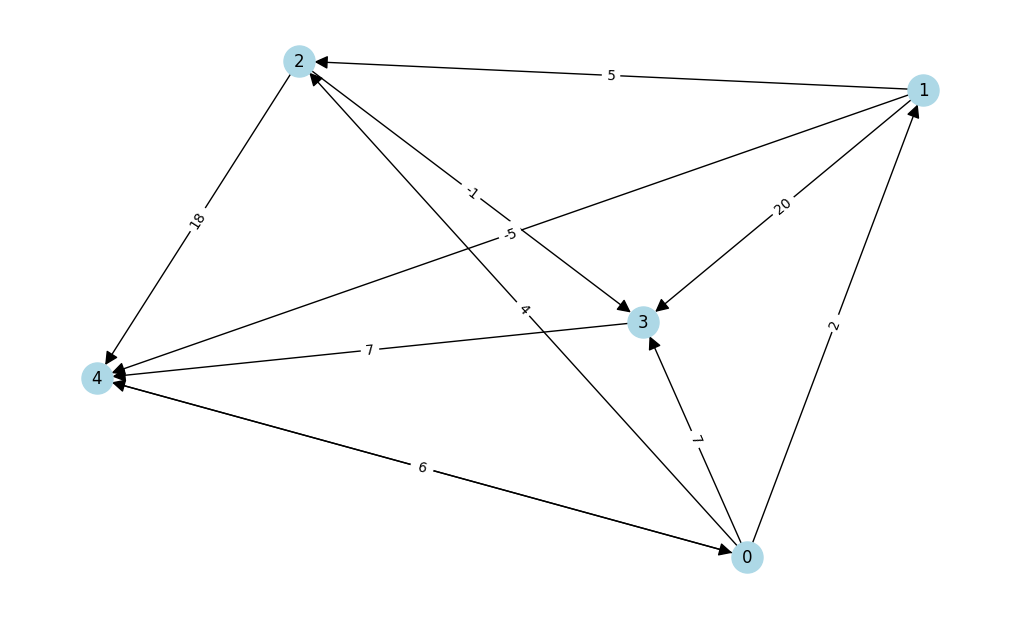

In [18]:
G = gnp_random_connected_graph(5, 1, True, True)

## Bellman-Ford algorithm

In [19]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [20]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 1: 2
Distance to 2: 4
Distance to 3: 3
Distance to 4: -3


In [21]:
#if we start from 0

def bell_ford(G__):
    dct_distance = {x: G__.adj[0][x]['weight'] if x in G__.adj[0] else float('inf') for x in G__.nodes}
    dct_distance[0] = 0
    nodes = list(G__.nodes)[1:]
    g = nx.Graph()

    for _ in range(len(dct_distance) - 2):
        for v in nodes:
            for u in G__.nodes:
                if u in G__.adj and v in G__.adj[u]:
                    dct_distance[v] = min(dct_distance[v], dct_distance[u] + G__.adj[u][v]['weight'])
                    g.add_edge(u, v, weight = min(dct_distance[v], dct_distance[u] + G__.adj[u][v]['weight']))

    # Chek if there are negative cycles
    for v1 in nodes:
        for u1 in G__.nodes:
            if  u1 in G__.adj and v1 in G__.adj[u1] and dct_distance[v1] > dct_distance[u1] + G__.adj[u1][v1]['weight']:
                return 'Negative cycle detected'

    return g

grph_bell_ford = bell_ford(G)
print(grph_bell_ford.edges)

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


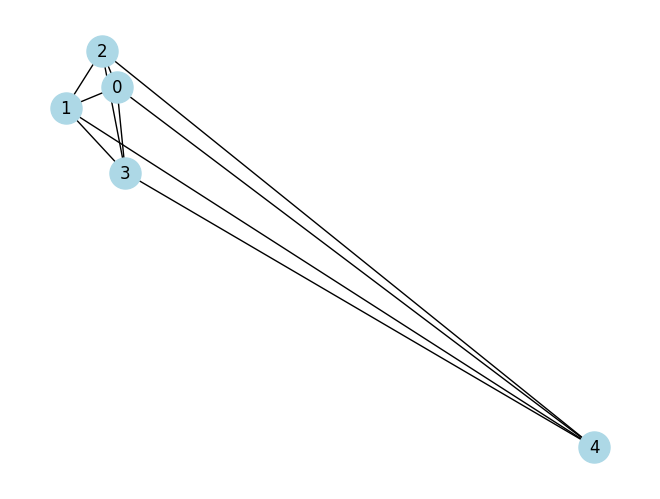

In [22]:
nx.draw(grph_bell_ford , node_color='lightblue', 
        with_labels=True,
        node_size=500)

5nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.000

10nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.000

20nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.003

50nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.156

100nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 1.264

250nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 21.239



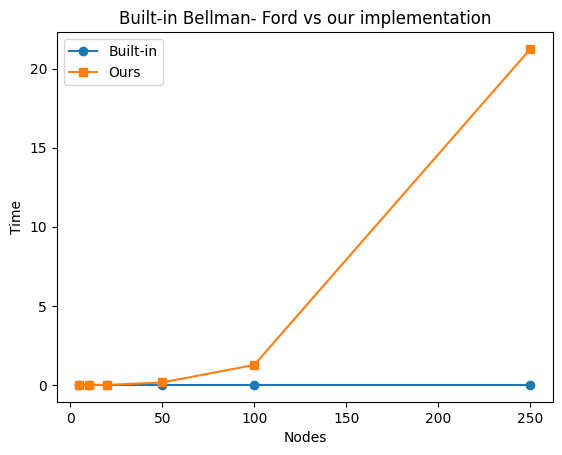

In [23]:
import matplotlib.pyplot as plt
from time import time
vertices_num = [5,10,20,50,100,250]
y1 = []
y2 = []

for i in vertices_num:
    time_sum = 0
    time_sum_own = 0

    G_ = gnp_random_connected_graph(i, 1, False, False)
    
    start = time()
    predecessors, dist = bellman_ford_predecessor_and_distance(G, 0) 
    stop = time() - start
    print(f"{i}nodes.\nBuilt-in algorithm worked in: {stop:.3f}")
    time_sum = stop

    start = time()
    grph = bell_ford(G_)
    stop = time() - start
    print(f"Our algorithm worked in: {stop:.3f}\n")
    time_sum_own = stop
    
    y1.append(float(f"{time_sum:.8f}"))
    y2.append(float(f"{time_sum_own:.8f}"))
                
            

plt.plot(vertices_num, y1, label='Built-in', marker='o')

# Plotting the second dataset
plt.plot(vertices_num, y2, label='Ours', marker='s')

# Adding labels and title
plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Built-in Bellman- Ford vs our implementation')

# Adding a legend to differentiate between datasets
plt.legend()

# Display the plot
plt.show()


Підсумок: Алгоритм працює гірше вбудованого. На малих вершинах алгоритм працює непогано. Це може бути пов’язано з способом перевірки на негативні цикли вбудованого алгоритму та нашого: можливо, вбудований алгоритм одразу перевіряє наявність негативних простих циклів та видає про це повідомлення, коли ж наш алгоритм робить це опісля всіх дій.

## Floyd-Warshall algorithm

In [24]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [25]:
def floyd_warshall(graph):
    marks = [[] for _ in range(len(graph))]
    warshall = [[] for _ in range(len(graph))] 


    for i in range(len(graph)):
        for j in range(len(graph)):
            if j in graph[i]:
                warshall[i].append(graph[i][j]["weight"])
            elif i == j:
                warshall[i].append(0)
            else:
                warshall[i].append(inf)
            if i==j:
                marks[i].append(-1)
            else:
                marks[i].append(i)
                
            
    

    for i, w_row in enumerate(warshall):
        new_warshall = []
        new_marks = []

        for j, row in enumerate(warshall):
            new_warshall.append([])
            new_marks.append([])
            for k, el in enumerate(row):
                if  warshall[i][k] + warshall[j][i]<el: 
                    new_warshall[-1].append(warshall[i][k] + warshall[j][i])
                    new_marks[-1].append(marks[i][k])
                else:
                    new_warshall[-1].append(el)
                    new_marks[-1].append(marks[j][k])
                    
        warshall = new_warshall
        marks = new_marks
    
    marks ={k:{i: v for i,v in enumerate(row)} for k, row in enumerate(marks)} 
    warshall ={k:{i: v for i,v in enumerate(row)} for k, row in enumerate(warshall)} 
    
    return marks, warshall

marks, matrix = floyd_warshall(G)
            

for i, row in marks.items():
    print(i, ":", row)
for i, row in matrix.items():
    print(i, ":", row)
            

0 : {0: -1, 1: 0, 2: 0, 3: 2, 4: 1}
1 : {0: 4, 1: -1, 2: 1, 3: 2, 4: 1}
2 : {0: 4, 1: 0, 2: -1, 3: 2, 4: 3}
3 : {0: 4, 1: 0, 2: 0, 3: -1, 4: 3}
4 : {0: 4, 1: 0, 2: 0, 3: 2, 4: -1}
0 : {0: 0, 1: 2, 2: 4, 3: 3, 4: -3}
1 : {0: 1, 1: 0, 2: 5, 3: 4, 4: -5}
2 : {0: 12, 1: 14, 2: 0, 3: -1, 4: 6}
3 : {0: 13, 1: 15, 2: 17, 3: 0, 4: 7}
4 : {0: 6, 1: 8, 2: 10, 3: 9, 4: 0}


In [26]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 1: 2, 2: 4, 3: 3, 4: -3}
Distances with 1 source: {1: 0, 2: 5, 3: 4, 4: -5, 0: 1}
Distances with 2 source: {2: 0, 3: -1, 4: 6, 0: 12, 1: 14}
Distances with 3 source: {3: 0, 4: 7, 0: 13, 1: 15, 2: 17}
Distances with 4 source: {4: 0, 0: 6, 1: 8, 2: 10, 3: 9}


5nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.000

10nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.000

20nodes.
Built-in algorithm worked in: 0.000
Our algorithm worked in: 0.000

50nodes.
Built-in algorithm worked in: 0.013
Our algorithm worked in: 0.015

100nodes.
Built-in algorithm worked in: 0.109
Our algorithm worked in: 0.131

250nodes.
Built-in algorithm worked in: 1.718
Our algorithm worked in: 2.095

375nodes.
Built-in algorithm worked in: 6.818
Our algorithm worked in: 7.703

500nodes.
Built-in algorithm worked in: 17.133
Our algorithm worked in: 20.050



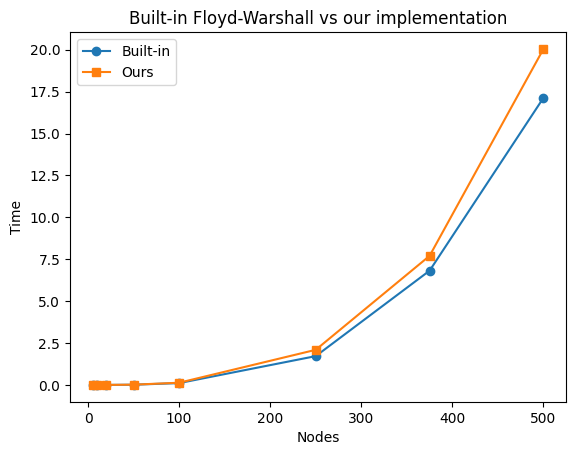

In [27]:
import matplotlib.pyplot as plt
from time import time
vertices_num = [5,10,20,50,100,250,375, 500]
y1 = []
y2 = []

for i in vertices_num:
    time_sum = 0
    time_sum_own = 0

    G_ = gnp_random_connected_graph(i, 1, False, False)
    
    start = time()
    predecessors, dist = floyd_warshall_predecessor_and_distance(G_) 
    stop = time() - start
    print(f"{i}nodes.\nBuilt-in algorithm worked in: {stop:.3f}")
    time_sum = stop

    start = time()
    marks, matrix = floyd_warshall(G_)
    stop = time() - start
    print(f"Our algorithm worked in: {stop:.3f}\n")
    time_sum_own = stop
    
    y1.append(float(f"{time_sum:.8f}"))
    y2.append(float(f"{time_sum_own:.8f}"))
                
            

plt.plot(vertices_num, y1, label='Built-in', marker='o')

# Plotting the second dataset
plt.plot(vertices_num, y2, label='Ours', marker='s')

# Adding labels and title
plt.xlabel('Nodes')
plt.ylabel('Time')
plt.title('Built-in Floyd-Warshall vs our implementation')

# Adding a legend to differentiate between datasets
plt.legend()

# Display the plot
plt.show()


Підсумок: Наш алгоритм працює практично з такою самою ефективністю, як і вбудований. На малій кількості вершим він навіть дещо ефективніше. Невелика перевага, яку ми бачимо на 500 вершинах пов’язана з тим, що вбудований алгоритм має меншу складність: О(n^3). 

## Загальний підсумок

Алгоритми Краскла та Прима найкраще працюють на графах з малою кількістю вершин, очевидно, пов’язано з тим, що алгоритм має проходитись по значно більшій кількості ребер, що, практично, експоненційно збільшує його час. 

Алгоритм Флойда- Ворашала, в порівнянні з вбудованим, працює просто прекрасно на будь- якій кількості вершин( як мінімум до 500). Якщо дивитись не в порівняні, то час так само збільшується експоненційно, через більшу кількість операцій. 

Наш алгоритм Белмана- Форда може зрівнятись з вбудованим до приблизно 50 вершин. Пізніше він видає гірші результати.  

 

Нюанси: можлива похибка в графіках, яка пов’язана з особливістю роботи процесора, адже він постійно пробує ‘вгадати’ наступні операції, через це дані експерименту можуть різнитись на тисячні, а то й соті секунди, бо в одному випадку процесор ‘вгадав’ наступну операцію, а в іншому ні. 

Невелике порівняння наших алгоритмів:  

Краскалу на 250вершин вдалось знайти каркас за 0.542 секунди, коли ж Приму знадобилось 1.171 секунди.  

Белману- Форду на подолання 250 вершин знадобилось 23 секунди, коли ж Флойду- Воршалу тільки 2.235 секунди. 

## Some useful explanations

### How to get list of edges for your algorithm

In [28]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [29]:
edges[:5]

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2)]

### To get edges with weights

In [30]:
edges = list(G.edges(data=True))

In [31]:
edges[:5]

[(0, 1, {'weight': 2}),
 (0, 2, {'weight': 4}),
 (0, 3, {'weight': 7}),
 (0, 4, {'weight': -1}),
 (1, 2, {'weight': 5})]

In [32]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [33]:
import time
from tqdm import tqdm

In [34]:
NUM_OF_ITERATIONS = 1000
time_taken = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    # note that we should not measure time of graph creation
    G = gnp_random_connected_graph(100, 0.4, False)
    
    start = time.time()
    tree.minimum_spanning_tree(G, algorithm="prim")
    end = time.time()
    
    time_taken += end - start

time_taken / NUM_OF_ITERATIONS

  3%|▎         | 31/1000 [00:00<00:03, 297.91it/s]

100%|██████████| 1000/1000 [00:03<00:00, 312.39it/s]


0.0011337051391601563